# Data Analysis, Prediction and Healthcare Impact

This Notebook is for analysis of the fire and AQI data extracted for Del Rio Texas and comparing certain results. The results/visualizations included are:
1. Produce a histogram showing the number of fires occurring every 50 mile distance from your assigned city up to the max specified distance.
2. Produce a time series graph of total acres burned per year for the fires occurring in the specified distance from your city.
3. Produce a time series graph containing your fire smoke estimate for your city and the AQI estimate for your city.

Also, we are deploying a Predictive Model to predict the Smoke Estimate up to 2049 in the future. I have used Time Series forecasting model here: ARIMA for the prediction.

## Import Libraries

In [90]:
import pandas as  pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA

## Fires Data

Import the Wildfire data we extracted for Del Rio

In [18]:
del_rio_fires_df = pd.read_parquet('del_rio_fires_df.pqt')
del_rio_fires_df.head()

,OBJECTID,USGS_Assigned_ID,Assigned_Fire_Type,Fire_Year,Fire_Polygon_Tier,Fire_Attribute_Tiers,GIS_Acres,GIS_Hectares,Source_Datasets,Listed_Fire_Types,...,Overlap_Within_1_or_2_Flag,Circleness_Scale,Circle_Flag,Exclude_From_Summary_Rasters,Shape_Length,Shape_Area,fire_lat,fire_lon,distance_from_del_rio,smoke_estimate
0,14306,14306,Wildfire,1963,1,"1 (1), 3 (1)",4995.253626,2021.507422,Comb_National_NIFC_Interagency_Fire_Perimeter_...,Wildfire (2),...,"Caution, this Wildfire in 1963 overlaps with a...",0.994707,1.0,Yes,15980.673439,2.021507e+07,36.475031,-106.702400,594.570587,84.014476
1,14305,14305,Wildfire,1963,1,"1 (3), 3 (3)",4995.910129,2021.773099,Comb_National_NIFC_Interagency_Fire_Perimeter_...,Wildfire (6),...,None,0.994948,1.0,Yes,15979.785579,2.021773e+07,35.678581,-106.479715,543.334644,91.949044
2,14341,14341,Wildfire,1963,1,"1 (2), 3 (2)",647.246513,261.931371,Comb_National_NIFC_Interagency_Fire_Perimeter_...,Wildfire (4),...,None,0.272200,NaN,No,10996.509615,2.619314e+06,43.526843,-103.471741,986.598492,6.560384
3,14308,14308,Wildfire,1963,1,"1 (1), 3 (2)",4293.410613,1737.481631,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (1), Likely Wildfire (2)",...,None,0.344648,NaN,No,25169.664017,1.737482e+07,43.154410,-113.233561,1171.237153,36.657056
4,14324,14324,Wildfire,1963,1,"1 (1), 3 (3)",1552.699889,628.355352,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (3), Likely Wildfire (1)",...,None,0.709395,NaN,No,10550.269932,6.283554e+06,34.728314,-119.946244,1175.406549,13.209897


In [19]:
# del_rio_fires_df = pd.read_csv('del_rio_fires_df.csv')
# del_rio_fires_df.head()

In [20]:
del_rio_fires_df.describe()

,OBJECTID,USGS_Assigned_ID,Fire_Year,Fire_Polygon_Tier,GIS_Acres,GIS_Hectares,Circleness_Scale,Circle_Flag,Shape_Length,Shape_Area,fire_lat,fire_lon,distance_from_del_rio,smoke_estimate
count,70861.000000,70861.000000,70861.000000,70861.000000,7.086100e+04,7.086100e+04,70861.000000,5440.0,7.086100e+04,7.086100e+04,70861.000000,70861.000000,70861.000000,7.086100e+04
mean,72207.062799,72207.062799,2003.644628,2.884196,1.788710e+03,7.238653e+02,0.471217,1.0,1.188840e+04,7.238653e+06,36.498640,-102.458844,910.914087,2.646780e+01
std,32845.279641,32845.279641,13.724469,2.452673,1.263020e+04,5.111262e+03,0.261127,0.0,7.499986e+04,5.111262e+07,4.669699,12.727054,273.895628,2.720438e+02
min,14304.000000,14304.000000,1963.000000,1.000000,6.558795e-07,2.654250e-07,0.000051,1.0,1.212677e+00,2.654250e-03,24.671056,-121.001852,28.803066,6.925918e-09
25%,44065.000000,44065.000000,1996.000000,1.000000,1.280371e+01,5.181479e+00,0.262550,1.0,1.133512e+03,5.181479e+04,33.538415,-113.798435,698.491282,1.468207e-01
50%,73113.000000,73113.000000,2008.000000,1.000000,1.179990e+02,4.775249e+01,0.435511,1.0,3.933408e+03,4.775249e+05,36.015440,-105.456179,977.185558,1.333327e+00
75%,100792.000000,100792.000000,2014.000000,6.000000,9.972989e+02,4.035925e+02,0.647025,1.0,1.246434e+04,4.035925e+06,39.680282,-91.351740,1148.241019,1.118261e+01
max,135060.000000,135060.000000,2020.000000,8.000000,1.566273e+06,6.338483e+05,0.999917,1.0,1.757948e+07,6.338483e+09,47.462191,-80.183831,1249.996926,3.915455e+04


## Create a Smoke Estimate

We will be creating a smoke estimate based on the metrics we extracted from the fire data and create a metric which will define the impact of the fire on the city.
I have created this metric based on the proportionality of the metrics.

**Smoke Estimate:**
Smoke Estimate = (Area burned in Acres/Distance from the city)*10

Smoke estimate is directly proportional to the area burnt i.e. it will have a higher impact on the city if the area is more and is inversely proportional to the distance from the city i.e. it will have higher impact for a shorter distance from the city. 10 is used to normalize the values.

In [21]:
del_rio_fires_df['smoke_estimate'] = (del_rio_fires_df['GIS_Acres']/del_rio_fires_df['distance_from_del_rio'])*10
del_rio_fires_df.head()

,OBJECTID,USGS_Assigned_ID,Assigned_Fire_Type,Fire_Year,Fire_Polygon_Tier,Fire_Attribute_Tiers,GIS_Acres,GIS_Hectares,Source_Datasets,Listed_Fire_Types,...,Overlap_Within_1_or_2_Flag,Circleness_Scale,Circle_Flag,Exclude_From_Summary_Rasters,Shape_Length,Shape_Area,fire_lat,fire_lon,distance_from_del_rio,smoke_estimate
0,14306,14306,Wildfire,1963,1,"1 (1), 3 (1)",4995.253626,2021.507422,Comb_National_NIFC_Interagency_Fire_Perimeter_...,Wildfire (2),...,"Caution, this Wildfire in 1963 overlaps with a...",0.994707,1.0,Yes,15980.673439,2.021507e+07,36.475031,-106.702400,594.570587,84.014476
1,14305,14305,Wildfire,1963,1,"1 (3), 3 (3)",4995.910129,2021.773099,Comb_National_NIFC_Interagency_Fire_Perimeter_...,Wildfire (6),...,None,0.994948,1.0,Yes,15979.785579,2.021773e+07,35.678581,-106.479715,543.334644,91.949044
2,14341,14341,Wildfire,1963,1,"1 (2), 3 (2)",647.246513,261.931371,Comb_National_NIFC_Interagency_Fire_Perimeter_...,Wildfire (4),...,None,0.272200,NaN,No,10996.509615,2.619314e+06,43.526843,-103.471741,986.598492,6.560384
3,14308,14308,Wildfire,1963,1,"1 (1), 3 (2)",4293.410613,1737.481631,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (1), Likely Wildfire (2)",...,None,0.344648,NaN,No,25169.664017,1.737482e+07,43.154410,-113.233561,1171.237153,36.657056
4,14324,14324,Wildfire,1963,1,"1 (1), 3 (3)",1552.699889,628.355352,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (3), Likely Wildfire (1)",...,None,0.709395,NaN,No,10550.269932,6.283554e+06,34.728314,-119.946244,1175.406549,13.209897


The smoke estimate is then aggregated Annually where I have taken **Average/Mean** of the Daily Smoke Estimate to get an Annual Smoke Estimate. I have also tried the sum to see the variation but then finalized the Average.

In [22]:
del_rio_fires_df_annual =  del_rio_fires_df.groupby('Fire_Year').agg(sum_smoke_estimate=('smoke_estimate','sum'), avg_smoke_estimate=('smoke_estimate','mean')).reset_index()
del_rio_fires_df_annual.head()

,Fire_Year,sum_smoke_estimate,avg_smoke_estimate
0,1963,800.822591,3.364801
1,1964,2359.505274,12.418449
2,1965,591.580867,2.830530
3,1966,4312.369918,16.459427
4,1967,2520.693706,9.067244


#### Line Chart for sum of Smoke estimate across Years of Fire

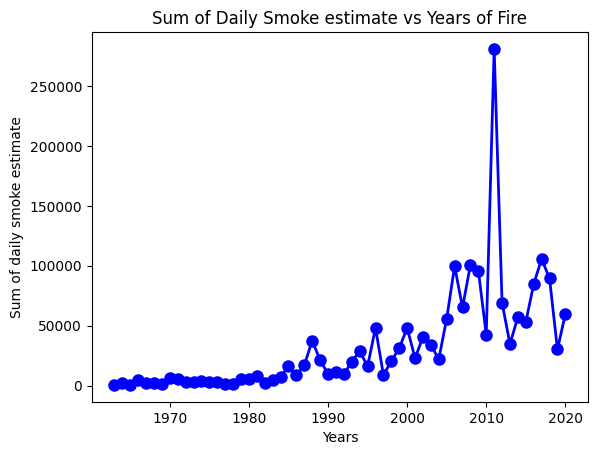

In [23]:
# plt.linechart(del_rio_fires_df_annual['Fire_Year'],del_rio_fires_df_annual['sum_smoke_estimate'])
plt.plot(del_rio_fires_df_annual['Fire_Year'],
         del_rio_fires_df_annual['sum_smoke_estimate'],
         marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.title('Sum of Daily Smoke estimate vs Years of Fire')
plt.xlabel('Years')
plt.ylabel('Sum of daily smoke estimate')
plt.show()

#### Line Chart for Average of Smoke estimate across Years of Fire

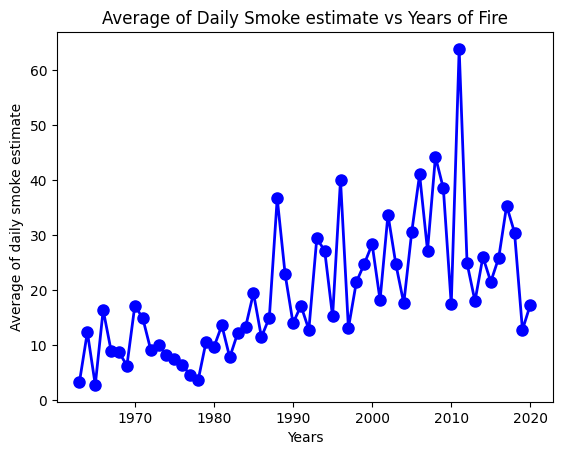

In [24]:
plt.plot(del_rio_fires_df_annual['Fire_Year'],
         del_rio_fires_df_annual['avg_smoke_estimate'],
         marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.title('Average of Daily Smoke estimate vs Years of Fire')
plt.xlabel('Years')
plt.ylabel('Average of daily smoke estimate')
plt.show()

## AQI Data

Import AQI data extracted for Del Rio Texas

In [25]:
final_aqi_df = pd.read_csv('final_aqi.csv',index_col=False)
final_aqi_df

,Unnamed: 0,date_local,pollutant_standard,aqi
0,0,1988-03-02,NaN,20.0
1,1,1988-03-05,NaN,18.0
2,2,1988-03-09,NaN,23.0
3,3,1988-03-16,NaN,46.0
4,4,1988-03-19,NaN,11.0
...,...,...,...,...
53553,2530,2022-12-19,NaN,14.0
53554,2531,2022-12-22,NaN,20.0
53555,2532,2022-12-25,NaN,11.0
53556,2533,2022-12-28,NaN,16.0


## Annual AQI calculation

Annual AQI is calculated by taking max of AQI for each day based on Pollutant standards and then taking the Average of the top 30 AQI values for a year. This will ensure we calculate the right annual AQI

In [26]:
aqi = final_aqi_df.groupby('date_local')['aqi'].max().reset_index()
aqi['year'] = pd.to_datetime(aqi['date_local']).dt.year
aqi_per_year = aqi.groupby('year')['aqi'].apply(lambda group: group.nlargest(30).mean()).reset_index()
aqi_per_year.head()

,year,aqi
0,1988,39.300000
1,1989,42.133333
2,1990,43.333333
3,1991,38.333333
4,1992,32.966667


#### Line Chart for Annual AQI across Years of Fire for Del Rio Texas

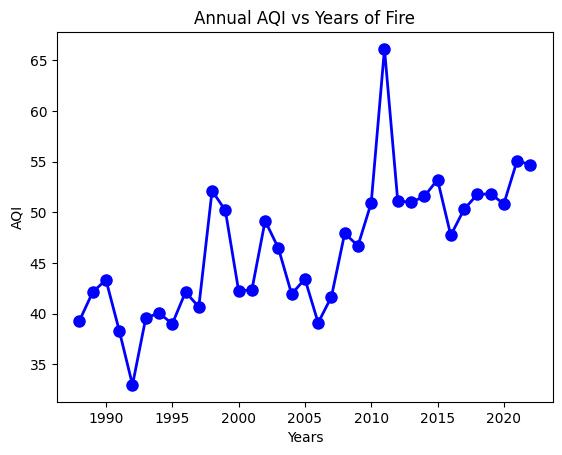

In [27]:
plt.plot(aqi_per_year['year'],
         aqi_per_year['aqi'],
         marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.title('Annual AQI vs Years of Fire')
plt.xlabel('Years')
plt.ylabel('AQI')
plt.show()

# Visualizations

## 1. Produce a histogram showing the number of fires occurring every 50 mile distance from your assigned city up to the max specified distance.

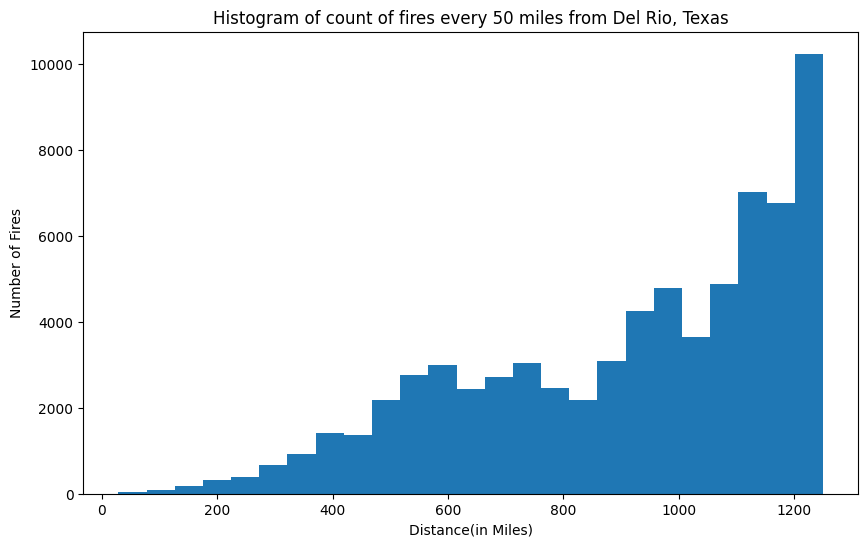

In [28]:
plt.figure(figsize=(10, 6)) 

bin_width = 50
data_range = max(del_rio_fires_df['distance_from_del_rio']) - min(del_rio_fires_df['distance_from_del_rio'])
num_bins = int(data_range / bin_width)

plt.hist(del_rio_fires_df['distance_from_del_rio'],bins=25)
# Customize the chart
plt.title('Histogram of count of fires every 50 miles from Del Rio, Texas')
plt.xlabel('Distance(in Miles)')
plt.ylabel('Number of Fires')

# Display the chart
plt.show()

## 2. Produce a time series graph of total acres burned per year for the fires occurring in the specified distance from your city.

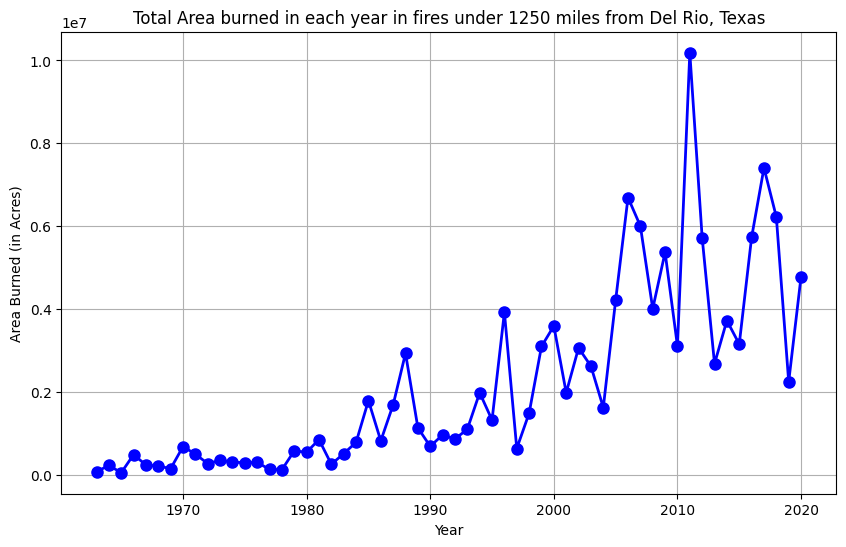

In [29]:
area_burned = del_rio_fires_df.groupby('Fire_Year')['GIS_Acres'].sum().reset_index()

plt.figure(figsize=(10, 6)) 

# Create a line chart for the second line
plt.plot(area_burned['Fire_Year'], area_burned['GIS_Acres'], marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

# Customize the chart
plt.title('Total Area burned in each year in fires under 1250 miles from Del Rio, Texas')
plt.xlabel('Year')
plt.ylabel('Area Burned (in Acres)')

# Display the chart
plt.grid(True)
plt.show()

## 3. Produce a time series graph containing your fire smoke estimate for your city and the AQI estimate for your city.

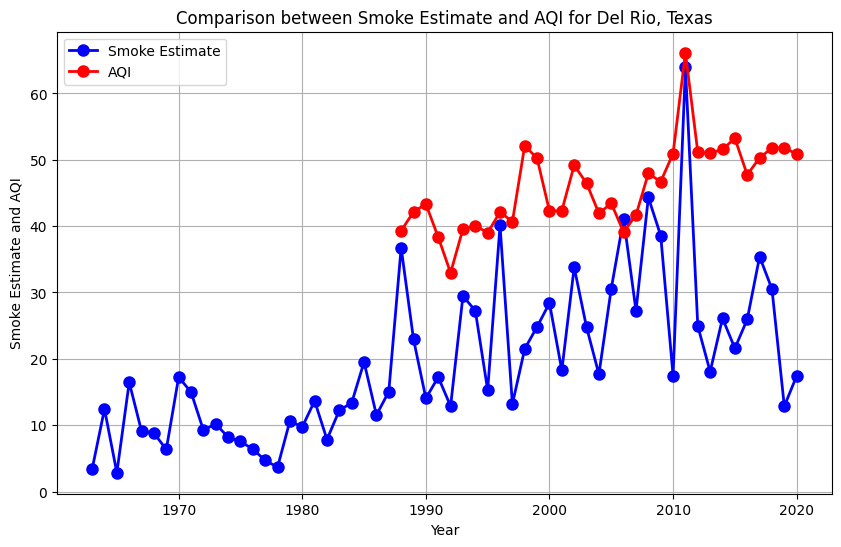

In [30]:
smoke_aqi = pd.merge(del_rio_fires_df_annual,aqi_per_year,how="left",left_on="Fire_Year",right_on="year")

plt.figure(figsize=(10, 6)) 
plt.plot(smoke_aqi['Fire_Year'], smoke_aqi['avg_smoke_estimate'], label='Smoke Estimate', marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

# Create a line chart for the second line
plt.plot(smoke_aqi['Fire_Year'], smoke_aqi['aqi'], label='AQI', marker='o', color='r', linestyle='-', linewidth=2, markersize=8)

# Customize the chart
plt.title('Comparison between Smoke Estimate and AQI for Del Rio, Texas')
plt.xlabel('Year')
plt.ylabel('Smoke Estimate and AQI')
plt.legend()  # Add a legend to distinguish the two lines

# Display the chart
plt.grid(True)
plt.show()

# Prediction

We will be predicting the smoke estimates calculated based on current data into future uoto 2049. I am using ARIMA time series model for the prediction and displaying the final predictions using the model

## Model parameters

In [31]:
# Load your data
data = pd.Series(del_rio_fires_df_annual['avg_smoke_estimate'])  

model = pm.auto_arima(data, seasonal=False, stepwise=True, suppress_warnings=True,
                   error_action="ignore", max_order=None, trace=True, information_criterion='bic')

# Get the best order (p, d, q) determined by auto_arima
best_order = model.get_params()['order']

print("Best (p, d, q) order:", best_order)


Performing stepwise search to minimize bic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : BIC=438.210, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : BIC=461.094, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : BIC=445.715, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : BIC=430.000, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : BIC=457.072, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : BIC=433.003, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : BIC=432.499, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : BIC=436.327, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : BIC=427.564, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : BIC=429.941, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : BIC=429.137, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : BIC=441.703, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : BIC=432.753, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.472 seconds
Best (p, d, q) order: (0, 1, 1)


## Fitting the model and tweaking parameters to get best  results

In [32]:
# Fit ARIMA model
model = ARIMA(data, order=(4,2,3))
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=28)
predictions_data = pd.DataFrame({'Year': range(2021, 2049), 'Predictions': predictions})

print("AIC : "+str(model_fit.aic)+" BIC : "+str(model_fit.bic))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AIC : 428.72015890632406 BIC : 444.92297243220526


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Final Prediction Visualization

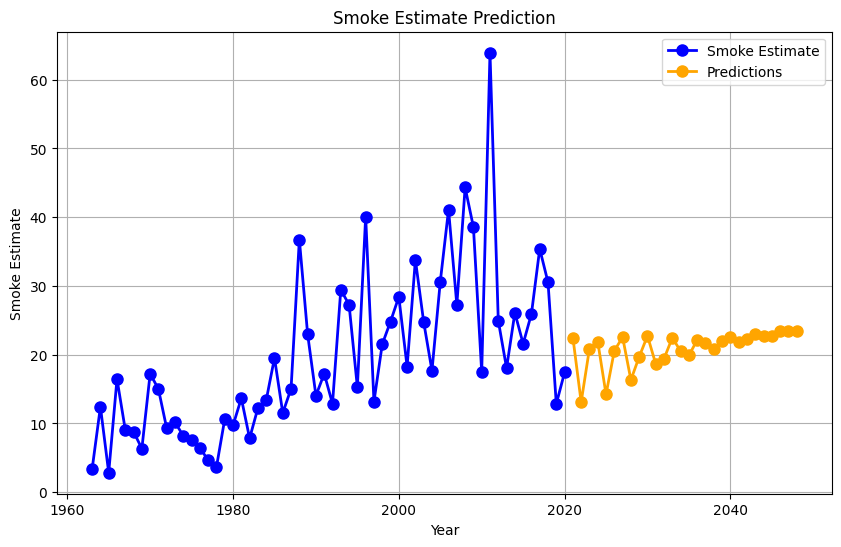

In [33]:
plt.figure(figsize=(10, 6)) 
plt.plot(del_rio_fires_df_annual['Fire_Year'], del_rio_fires_df_annual['avg_smoke_estimate'], label='Smoke Estimate', marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

# Create a line chart for the second line
plt.plot(predictions_data['Year'], predictions_data['Predictions'], label='Predictions', marker='o', color='orange', linestyle='-', linewidth=2, markersize=8)

# Customize the chart
plt.title('Smoke Estimate Prediction')
plt.xlabel('Year')
plt.ylabel('Smoke Estimate')
plt.legend()  # Add a legend to distinguish the two lines

# Display the chart
plt.grid(True)
plt.show()

# Healthcare effect in Val Verde

In [147]:
deaths_race_df = pd.read_excel('deaths_by_race.xlsx')
# deaths_race_df['Year']=deaths_race_df['Year'].astype('float')
deaths_race_df.head()

,Year,All Races Total Deaths - Texas,All Races Total Deaths,All Races Male Deaths,All Races Female Deaths,White Total Deaths,White Male Deaths,White Female Deaths,Black Total Deaths,Black Male Deaths,Black Female Deaths,Hispanic* Total Deaths,Hispanic* Male Deaths,Hispanic* Female Deaths,Other** Total Deaths,Other** Male Deaths,Other** Female Deaths
0,2015,189166,302.6656,97822,91344,121778,61875,59903,22725,11713,11012,39508,21483,18025,5155,2751,2404
1,2014,183303,293.2848,95035,88268,119355,60880,58475,21880,11164,10716,37629,20562,17067,4439,2429,2010
2,2013,178501,285.6016,91945,86556,117110,59238,57872,21141,10863,10278,36223,19696,16527,4027,2148,1879
3,2012,173935,278.2960,89332,84603,115089,58194,56895,20560,10460,10100,34756,18798,15958,3530,1880,1650
4,2011,167997,268.7952,85728,82269,111995,56096,55899,20160,10056,10104,32638,17823,14815,3204,1753,1451


In [148]:
deaths_race_df.dtypes

Year                                int64
All Races Total Deaths - Texas      int64
All Races Total Deaths            float64
All Races Male Deaths               int64
All Races Female Deaths             int64
White Total Deaths                  int64
White Male Deaths                   int64
White Female Deaths                 int64
Black Total Deaths                  int64
Black Male Deaths                   int64
Black Female Deaths                 int64
Hispanic* Total Deaths             object
Hispanic* Male Deaths              object
Hispanic* Female Deaths            object
Other** Total Deaths               object
Other** Male Deaths                object
Other** Female Deaths              object
dtype: object

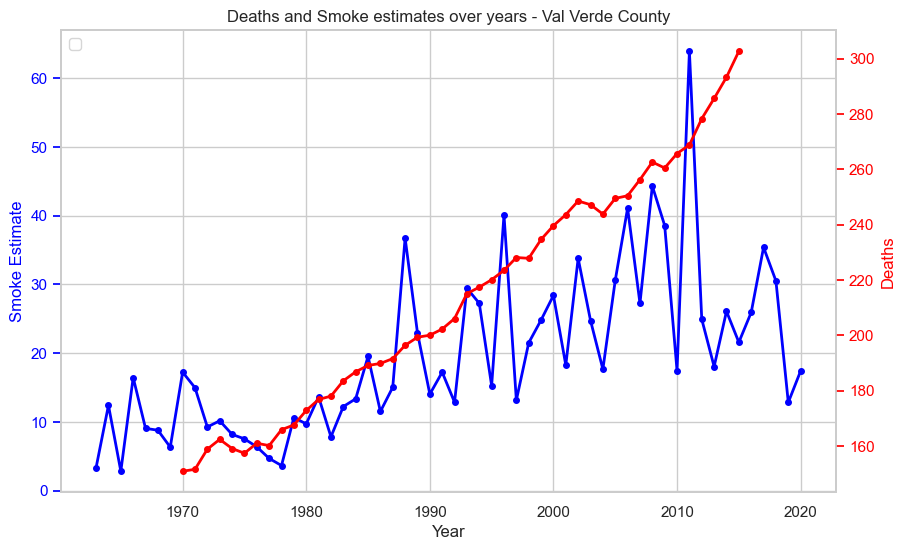

In [152]:
# plt.figure(figsize=(10, 6)) 

# plt.plot(smoke_aqi['Fire_Year'], smoke_aqi['avg_smoke_estimate'], label='Smoke Estimate', marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

# # Create a line chart for the second line
# plt.plot(smoke_aqi['Fire_Year'], smoke_aqi['aqi'], label='AQI', marker='o', color='r', linestyle='-', linewidth=2, markersize=8)

# plt.plot(deaths_race_df['Year'], deaths_race_df['All Races Total Deaths'], label='Deaths', marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

# # Create a line chart for the second line
# plt.plot(predictions_data['Year'], predictions_data['Predictions'], label='Predictions', marker='o', color='orange', linestyle='-', linewidth=2, markersize=8)

# Create the first y-axis 
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first dataset on the first y-axis
ax1.plot(smoke_aqi['Fire_Year'], smoke_aqi['avg_smoke_estimate'], marker='o', color='blue', linestyle='-', linewidth=2, markersize=4)
# ax1.plot(x, y1, color='blue', label='sin(x)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Smoke Estimate', color='blue')
ax1.tick_params('y', colors='blue')

# Create the second y-axis
ax2 = ax1.twinx()

# Plot the second dataset on the second y-axis
ax2.plot(deaths_race_df['Year'], deaths_race_df['All Races Total Deaths'],marker='o', color='red', linestyle='-', linewidth=2, markersize=4)
# ax2.plot(x, y2, color='red', label='cos(x)')
ax2.set_ylabel('Deaths', color='red')
ax2.tick_params('y', colors='red')

# Add a legend for both datasets
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Deaths and Smoke estimates over years - Val Verde County')
plt.grid(False)
plt.show()

# # Customize the chart
# plt.title('Deaths')
# plt.xlabel('Year')
# plt.ylabel('Deaths')
# plt.legend()  # Add a legend to distinguish the two lines

# # Display the chart
# plt.grid(True)
# plt.show()

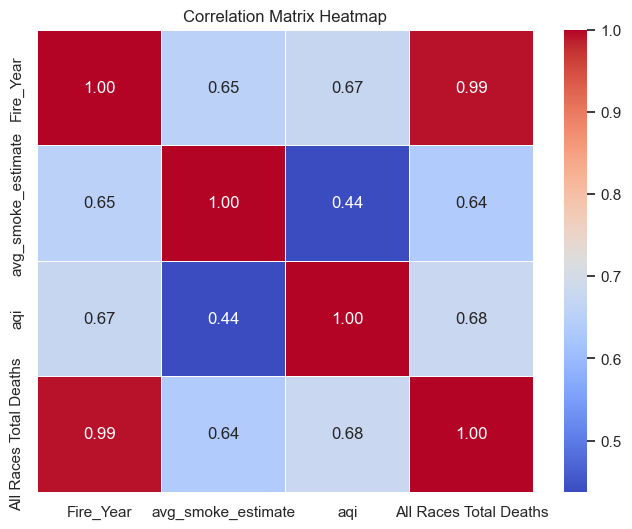

In [150]:
smoke_deaths = pd.merge(smoke_aqi,deaths_race_df,left_on="Fire_Year",right_on="Year",how="inner")
smoke_deaths_filtered = smoke_deaths[["Fire_Year","avg_smoke_estimate","aqi", "All Races Total Deaths"]]
smoke_deaths_filtered


# Calculate the correlation matrix
correlation_matrix = smoke_deaths_filtered.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# correlation_coefficient = deaths_race_df['All Races Total Deaths'].corr(smoke_aqi['avg_smoke_estimate'])
# correlation_coefficient

In [66]:
deaths_infant_df = pd.read_excel('infant_fetal_deaths.xlsx')
# deaths_race_df['Year']=deaths_race_df['Year'].astype('float')
deaths_infant_df.head()

,Year,Infant Deaths,Infant Death Rate,Fetal Deaths,Fetal Death Ratio
0,2015,2270,5.6,2172,5.4
1,2014,2320,5.8,2200,5.5
2,2013,2253,5.8,2092,5.4
3,2012,2224,5.8,2028,5.3
4,2011,2136,5.7,2087,5.5


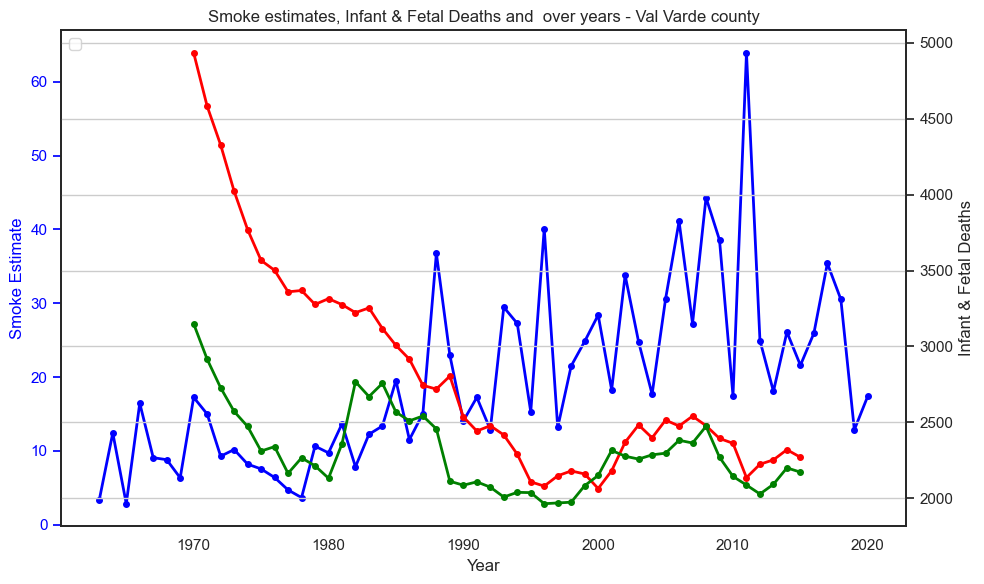

In [128]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first dataset on the first y-axis
ax1.plot(smoke_aqi['Fire_Year'], smoke_aqi['avg_smoke_estimate'], marker='o', color='blue', linestyle='-', linewidth=2, markersize=4)
# ax1.plot(x, y1, color='blue', label='sin(x)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Smoke Estimate', color='blue')
ax1.tick_params('y', colors='blue')

# Create the second y-axis
ax2 = ax1.twinx()

# Plot the second dataset on the second y-axis
#ax2.plot(deaths_race_df['Year'], deaths_race_df['All Races Total Deaths'],marker='o', color='r', linestyle='-', linewidth=2, markersize=4)
ax2.plot(deaths_infant_df['Year'], deaths_infant_df['Infant Deaths'],marker='o', color='red', linestyle='-', linewidth=2, markersize=4)
ax2.plot(deaths_infant_df['Year'], deaths_infant_df['Fetal Deaths'],marker='o', color='green', linestyle='-', linewidth=2, markersize=4)
#
# ax2.plot(x, y2, color='red', label='cos(x)')
ax2.set_ylabel('Infant & Fetal Deaths')
ax2.tick_params('y')

# Add a legend for both datasets
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Smoke estimates, Infant & Fetal Deaths and  over years - Val Varde county')
plt.grid(True)
plt.tight_layout()  # Adjust layout
plt.show()

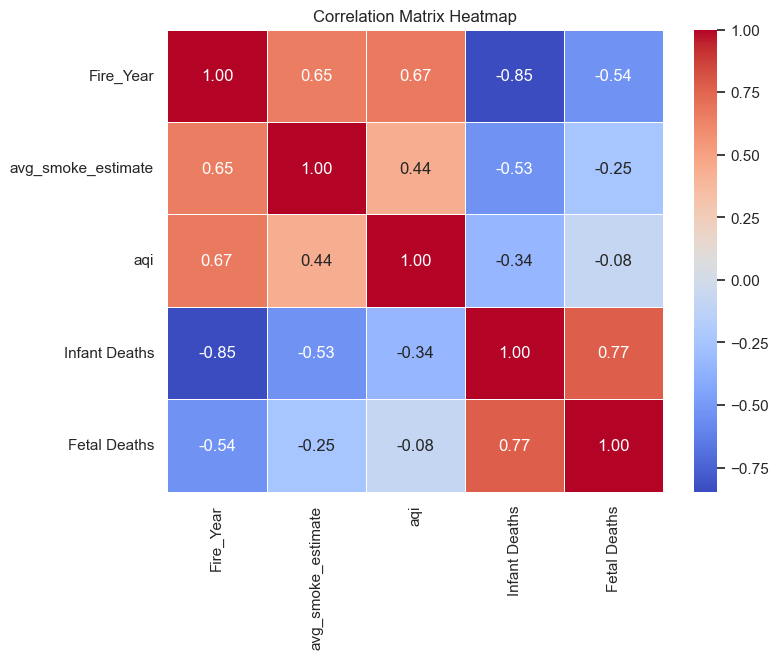

In [132]:
smoke_infant_deaths = pd.merge(smoke_aqi,deaths_infant_df,left_on="Fire_Year",right_on="Year",how="inner")
smoke_infant_deaths_filtered = smoke_infant_deaths[["Fire_Year","avg_smoke_estimate","aqi", "Infant Deaths","Fetal Deaths"]]
smoke_infant_deaths_filtered


# Calculate the correlation matrix
correlation_matrix = smoke_infant_deaths_filtered.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# correlation_coefficient = deaths_race_df['All Races Total Deaths'].corr(smoke_aqi['avg_smoke_estimate'])
# correlation_coefficient

In [130]:
cancer_deaths_df = pd.read_excel('cancer_deaths.xlsx')
# deaths_race_df['Year']=deaths_race_df['Year'].astype('float')
cancer_deaths_df.head()

,Year,Population,Cancer Deaths,Population affected,Cancer Incidents
0,1990,38562,42,NaN,NaN
1,1991,39508,62,NaN,NaN
2,1992,40020,68,NaN,NaN
3,1993,40442,73,NaN,NaN
4,1994,41348,68,NaN,NaN


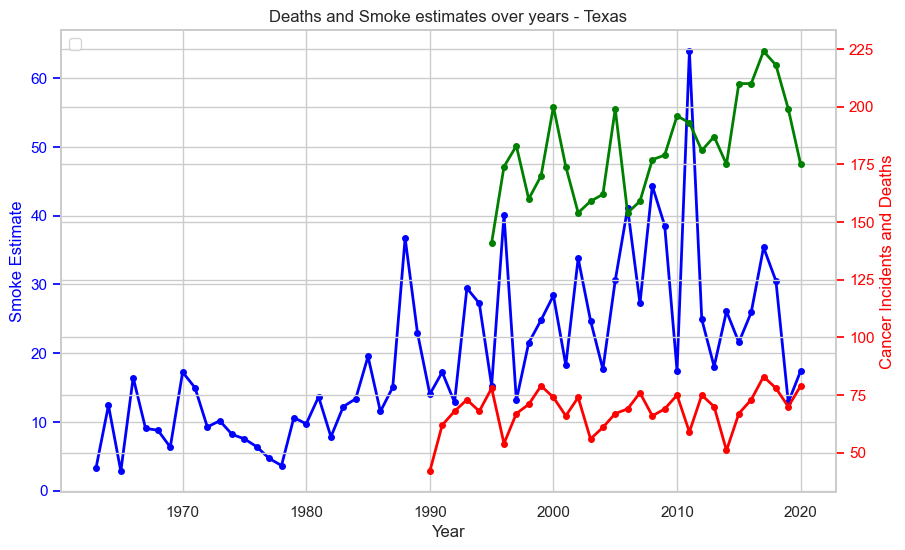

In [141]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first dataset on the first y-axis
ax1.plot(smoke_aqi['Fire_Year'], smoke_aqi['avg_smoke_estimate'], marker='o', color='blue', linestyle='-', linewidth=2, markersize=4)
# ax1.plot(x, y1, color='blue', label='sin(x)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Smoke Estimate', color='blue')
ax1.tick_params('y', colors='blue')

# Set the y-axis limits for the first axis
# ax1.set_ylim([0, 80])

# Create the second y-axis
ax2 = ax1.twinx()

# Plot the second dataset on the second y-axis
#ax2.plot(deaths_race_df['Year'], deaths_race_df['All Races Total Deaths'],marker='o', color='r', linestyle='-', linewidth=2, markersize=4)
ax2.plot(cancer_deaths_df['Year'], cancer_deaths_df['Cancer Deaths'],marker='o', color='red', linestyle='-', linewidth=2, markersize=4)
ax2.plot(cancer_deaths_df['Year'], cancer_deaths_df['Cancer Incidents'],marker='o', color='green', linestyle='-', linewidth=2, markersize=4)
#ax2.plot(deaths_infant_df['Year'], deaths_infant_df['Fetal Deaths'],marker='o', color='g', linestyle='-', linewidth=2, markersize=4)
#
# ax2.plot(x, y2, color='red', label='cos(x)')
ax2.set_ylabel('Cancer Incidents and Deaths', color='red')
ax2.tick_params('y', colors='red')

# Set the y-axis limits for the first axis
# ax2.set_ylim([20, 100])

# Add a legend for both datasets
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Deaths and Smoke estimates over years - Texas')
plt.show()

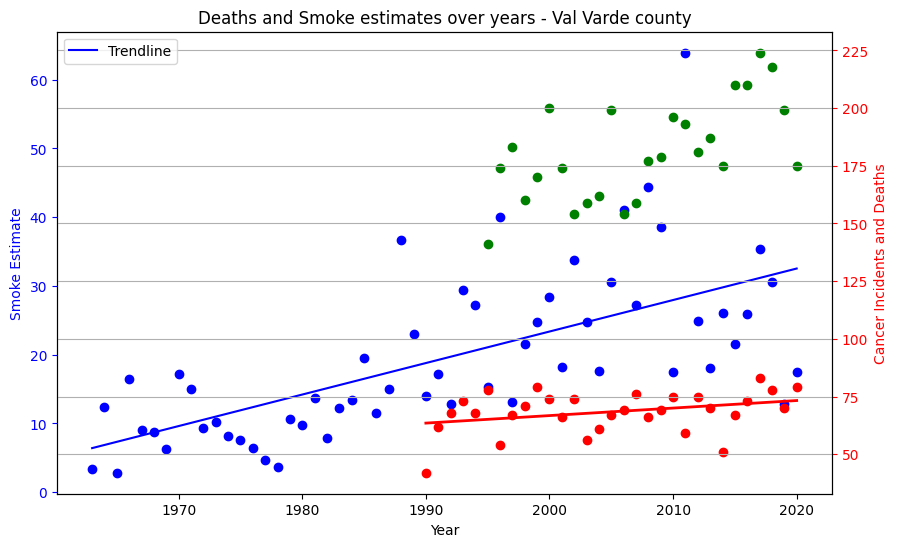

In [101]:
fig, ax1 = plt.subplots(figsize=(10, 6))
x=smoke_aqi['Fire_Year']
y1=smoke_aqi['avg_smoke_estimate']
coefficients = np.polyfit(x, y1, 1)
trendline = np.poly1d(coefficients)

# Plot the first dataset on the first y-axis
ax1.scatter(x, y1, color='b')
ax1.plot(x, trendline(x), linestyle='-', color='blue', label='Trendline')
ax1.set_xlabel('Year')
ax1.set_ylabel('Smoke Estimate', color='blue')
ax1.tick_params('y', colors='blue')

# Set the y-axis limits for the first axis
# ax1.set_ylim([0, 80])

# Create the second y-axis
ax2 = ax1.twinx()

# Plot the second dataset on the second y-axis
#ax2.plot(deaths_race_df['Year'], deaths_race_df['All Races Total Deaths'],marker='o', color='r', linestyle='-', linewidth=2, markersize=4)
coefficients = np.polyfit(cancer_deaths_df['Year'], cancer_deaths_df['Cancer Deaths'], 1)
trendline = np.poly1d(coefficients)
ax2.scatter(cancer_deaths_df['Year'], cancer_deaths_df['Cancer Deaths'], color='r')
ax2.plot(cancer_deaths_df['Year'], trendline(cancer_deaths_df['Year']), color='r', linestyle='-', linewidth=2, markersize=4)
coefficients = np.polyfit(cancer_deaths_df['Year'], cancer_deaths_df['Cancer Incidents'], 1)
trendline = np.poly1d(coefficients)
ax2.scatter(cancer_deaths_df['Year'], cancer_deaths_df['Cancer Incidents'], color='g')
ax2.plot(cancer_deaths_df['Year'], trendline(cancer_deaths_df['Year']), color='g', linestyle='-', linewidth=2, markersize=4)
#ax2.plot(deaths_infant_df['Year'], deaths_infant_df['Fetal Deaths'],marker='o', color='g', linestyle='-', linewidth=2, markersize=4)
#
# ax2.plot(x, y2, color='red', label='cos(x)')
ax2.set_ylabel('Cancer Incidents and Deaths', color='red')
ax2.tick_params('y', colors='red')

# Set the y-axis limits for the first axis
# ax2.set_ylim([20, 100])

# Add a legend for both datasets
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Deaths and Smoke estimates over years - Val Varde county')
plt.grid(True)
plt.show()

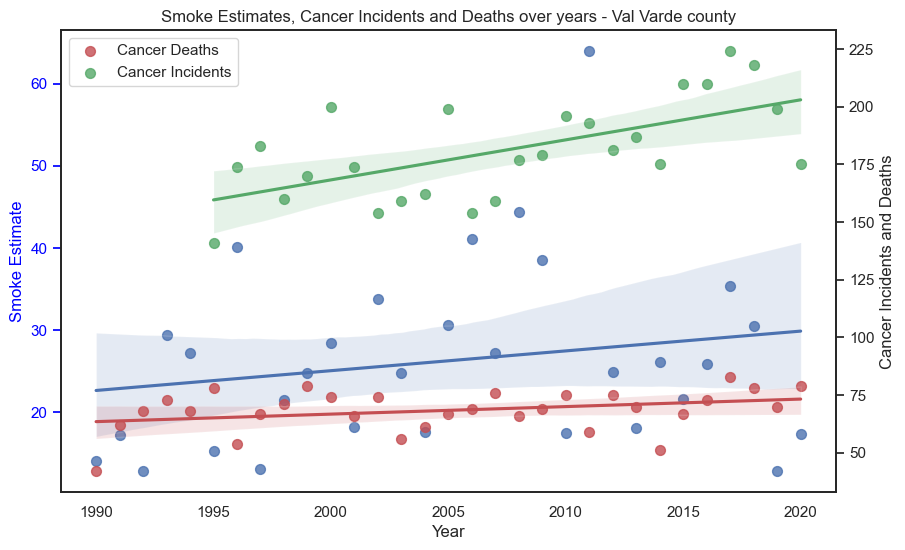

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming smoke_aqi, cancer_deaths_df are your dataframes

# Set the style for Seaborn
sns.set(style="white")

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first dataset on the first y-axis with scatter plot and trendline
sns.regplot(x='Fire_Year', y='avg_smoke_estimate', data=smoke_aqi[smoke_aqi['Fire_Year']>=1990], ax=ax1, marker='o', color='b', scatter_kws={"s": 50})
ax1.set_xlabel('Year')
ax1.set_ylabel('Smoke Estimate', color='blue')
ax1.tick_params('y', colors='blue')

# Create the second y-axis
ax2 = ax1.twinx()

# Plot the second dataset on the second y-axis with scatter plot and trendline
sns.regplot(x='Year', y='Cancer Deaths', data=cancer_deaths_df, ax=ax2, marker='o', color='r', scatter_kws={"s": 50}, label='Cancer Deaths')
sns.regplot(x='Year', y='Cancer Incidents', data=cancer_deaths_df, ax=ax2, marker='o', color='g', scatter_kws={"s": 50}, label='Cancer Incidents')

ax2.set_ylabel('Cancer Incidents and Deaths')
ax2.tick_params('y')

# Add a legend for both datasets
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Smoke Estimates, Cancer Incidents and Deaths over years - Val Varde county')
plt.show()

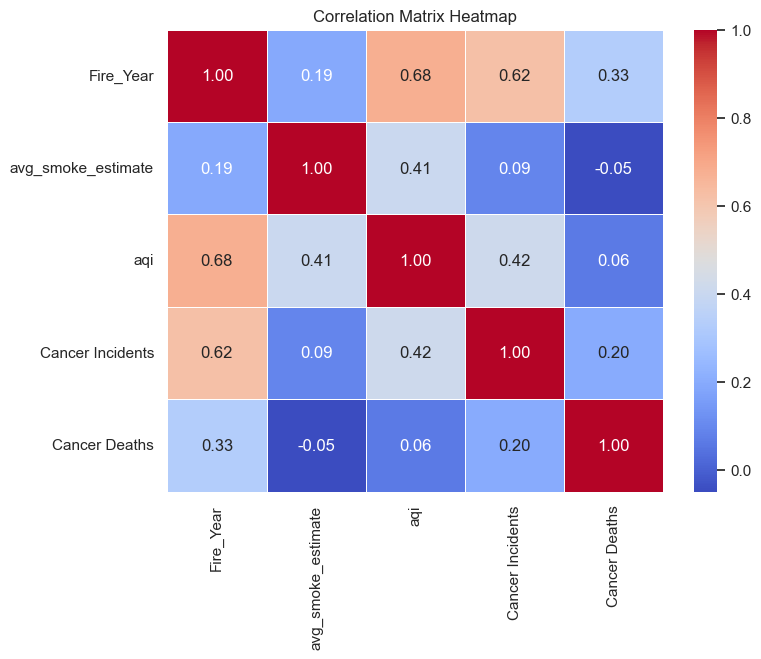

In [119]:
smoke_cancer_deaths = pd.merge(smoke_aqi,cancer_deaths_df,left_on="Fire_Year",right_on="Year",how="inner")
smoke_cancer_deaths_filtered = smoke_cancer_deaths[["Fire_Year","avg_smoke_estimate","aqi", "Cancer Incidents","Cancer Deaths"]]
smoke_cancer_deaths_filtered


# Calculate the correlation matrix
correlation_matrix = smoke_cancer_deaths_filtered.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# correlation_coefficient = deaths_race_df['All Races Total Deaths'].corr(smoke_aqi['avg_smoke_estimate'])
# correlation_coefficient

In [120]:
smoke_cancer_deaths_filtered

,Fire_Year,avg_smoke_estimate,aqi,Cancer Incidents,Cancer Deaths
0,1990,14.043947,43.333333,NaN,42
1,1991,17.241154,38.333333,NaN,62
2,1992,12.869674,32.966667,NaN,68
3,1993,29.461680,39.566667,NaN,73
4,1994,27.255888,40.066667,NaN,68
5,1995,15.278266,39.000000,141.0,78
6,1996,40.096730,42.133333,174.0,54
7,1997,13.162614,40.666667,183.0,67
8,1998,21.511048,52.133333,160.0,71
9,1999,24.826802,50.200000,170.0,79


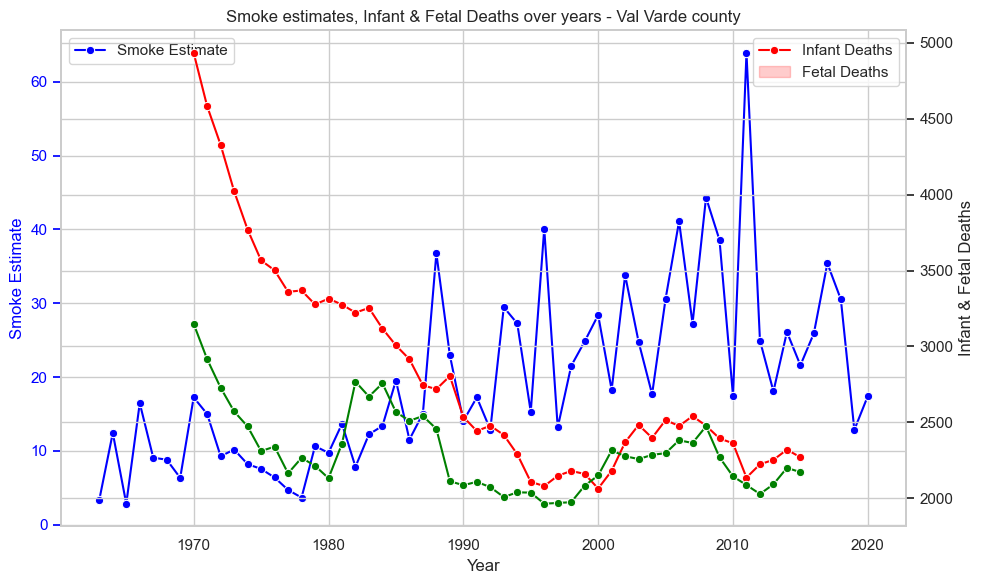

In [136]:
# Set the style for Seaborn
sns.set(style="whitegrid")

# Create a figure and axis with Seaborn
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first dataset on the first y-axis using Seaborn
sns.lineplot(data=smoke_aqi, x='Fire_Year', y='avg_smoke_estimate', marker='o', color='blue', ax=ax1)

ax1.set_xlabel('Year')
ax1.set_ylabel('Smoke Estimate', color='blue')
ax1.tick_params('y', colors='blue')

# Create the second y-axis
ax2 = ax1.twinx()

# Plot the second dataset on the second y-axis using Seaborn
sns.lineplot(data=deaths_infant_df, x='Year', y='Infant Deaths', marker='o', color='red', ax=ax2)
sns.lineplot(data=deaths_infant_df, x='Year', y='Fetal Deaths', marker='o', color='green', ax=ax2)

ax2.set_ylabel('Infant & Fetal Deaths')

# Add a legend for both datasets
ax1.legend(['Smoke Estimate'], loc='upper left')
ax2.legend(['Infant Deaths', 'Fetal Deaths'], loc='upper right')

plt.title('Smoke estimates, Infant & Fetal Deaths over years - Val Varde county')
plt.tight_layout()  # Adjust layout
plt.show()

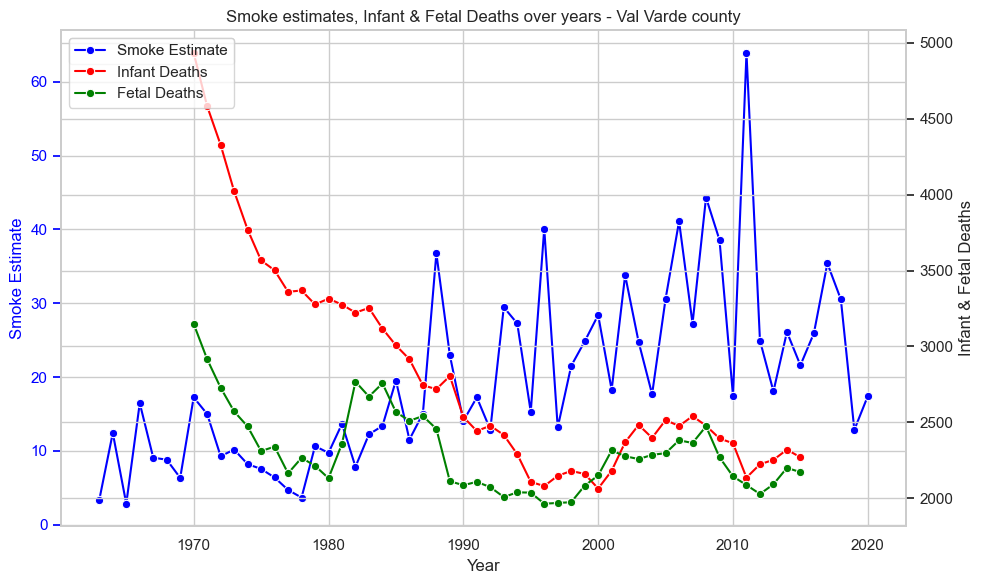

In [145]:
#sns.set(style="whitegrid")

# Create a figure and axis with Seaborn
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first dataset on the first y-axis using Seaborn
sns.lineplot(data=smoke_aqi, x='Fire_Year', y='avg_smoke_estimate', marker='o', color='blue', ax=ax1, label='Smoke Estimate')

ax1.set_xlabel('Year')
ax1.set_ylabel('Smoke Estimate', color='blue')
ax1.tick_params('y', colors='blue')

# Create the second y-axis
ax2 = ax1.twinx()

# Plot the second dataset on the second y-axis using Seaborn
sns.lineplot(data=deaths_infant_df, x='Year', y='Infant Deaths', marker='o', color='red', ax=ax2, label='Infant Deaths')
sns.lineplot(data=deaths_infant_df, x='Year', y='Fetal Deaths', marker='o', color='green', ax=ax2, label='Fetal Deaths')

ax2.set_ylabel('Infant & Fetal Deaths')

# Add a legend for both datasets
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Smoke estimates, Infant & Fetal Deaths over years - Val Varde county')
plt.tight_layout()  # Adjust layout
plt.show()